In [1]:
import pandas as pd    # for reading and manipulating tabular data
import networkx as nx  # for constructing and studying networks
import numpy as np     # for arrays
#import community           # for community structure later
import collections          # for manipulation tuples and zipping objects
import statistics as stats  # for generating summary statistics
import time                 # for measuring computating time
from matplotlib import pyplot as plt  # for outputting nice plots
import seaborn as sns                 # for creating even nicer plots

get_ipython().magic(u'matplotlib inline')

C:\Users\wr2zzgx\AppData\Local\Temp\ipykernel_12056\409953928.py:11: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic(u'matplotlib inline')


## Reading the data

In [2]:
# Create graph from edge list stored in data file
G = nx.read_edgelist(
    'twitter_combined.txt',      # File name 
    create_using = nx.Graph(),   # Use DiGraph() for directed graph, 
    nodetype = int               # Specifying node information type
) 

## Printing some statistics

In [3]:
G_nodes = G.nodes()
G_edges = G.edges()

print(type(G_nodes))
print(type(G_edges))

print(str(len(G_nodes)) + ' nodes, ' + str(len(G_edges)) + ' edges')

<class 'networkx.classes.reportviews.NodeView'>
<class 'networkx.classes.reportviews.EdgeView'>
81306 nodes, 1342310 edges


## Plotting the degree distribution

In [4]:
degree_count = collections.Counter([node[1] for node in G.degree])
deg, cnt = zip(*degree_count.items())

degSort = np.array(deg)[np.argsort(np.array(deg))]
cntSort = np.array(cnt)[np.argsort(np.array(deg))]

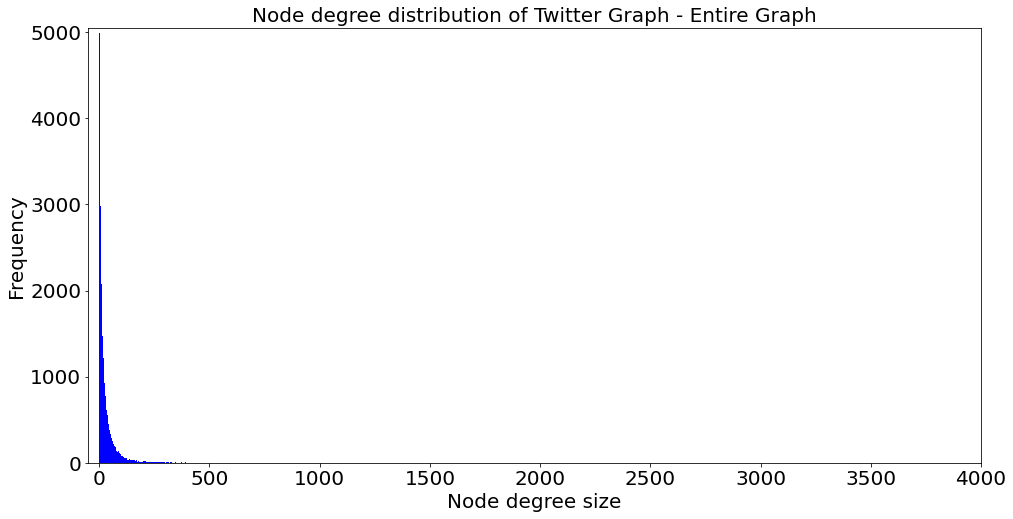

In [5]:
plt.figure(figsize=(16,8))

plt.bar(degSort, cntSort, width=1, color='b')
plt.xlabel("Node degree size", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([-50, 4000])
plt.ylim([ 0, 5050])
plt.title("Node degree distribution of Twitter Graph - Entire Graph", fontsize=20)
plt.show()

In [6]:
kmin = 1
Xo = np.array([np.log(i/kmin) for i in degSort])[degSort >= kmin].reshape(-1,1)
yo = np.array([np.log(i/np.sum(cntSort)) for i in cntSort])[degSort >= kmin].reshape(-1,1)

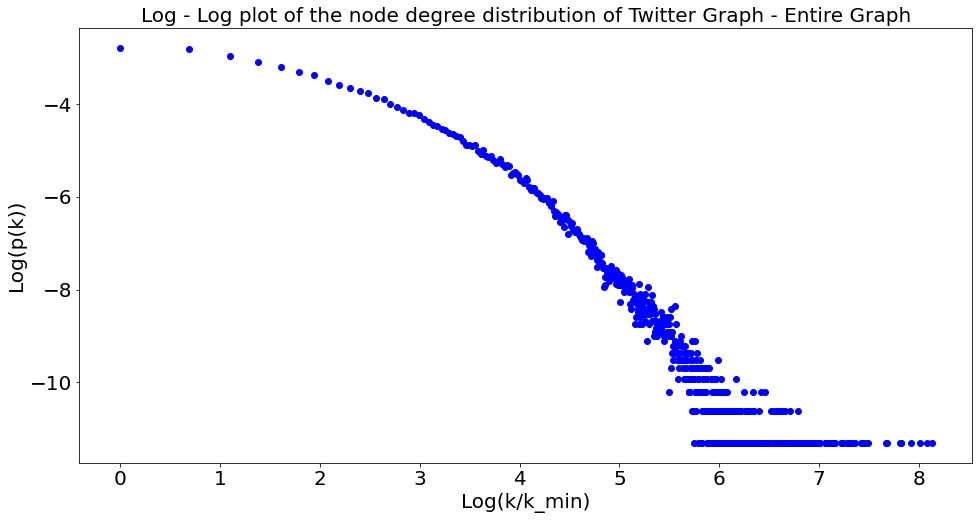

In [7]:
plt.figure(figsize=(16,8))

plt.scatter(Xo, yo, color='b')
plt.xlabel("Log(k/k_min)", fontsize=20)
plt.ylabel("Log(p(k))", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xlim([-50, 4000])
#plt.ylim([ 0, 5050])
plt.title("Log - Log plot of the node degree distribution of Twitter Graph - Entire Graph", fontsize=20)
plt.show()

In [8]:
kmin = 1
X = np.array([np.log(i/kmin) for i in degSort])[degSort >= kmin].reshape(-1,1)
y = np.array([np.log(i/np.sum(cntSort)) for i in cntSort])[degSort >= kmin].reshape(-1,1)

In [9]:
from sklearn import linear_model

# Linear regression model
model = linear_model.LinearRegression().fit(X, y)

In [10]:
alpha = -model.coef_[0][0]
alpha

1.8307650918760991

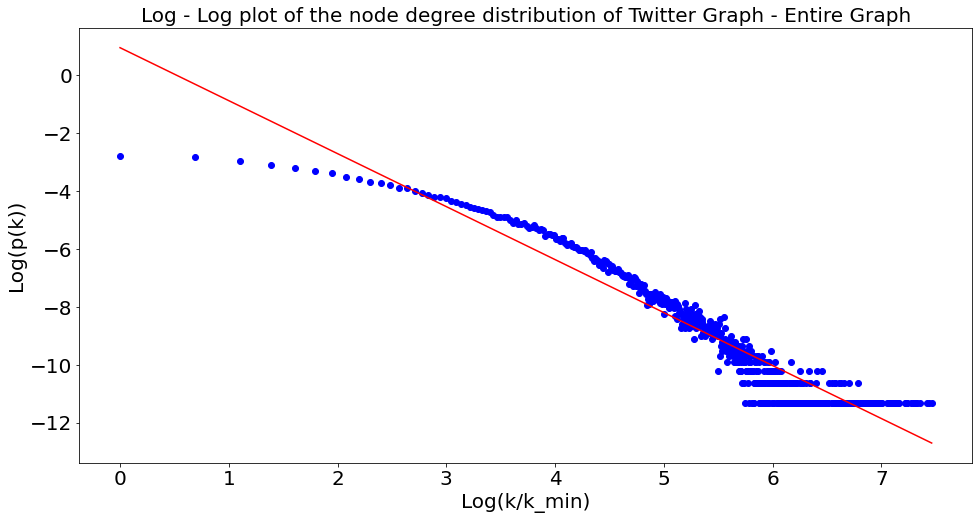

In [11]:
plt.figure(figsize=(16,8))

plt.scatter(X[0:-10], y[0:-10], color='b')
plt.plot(X[0:-10], model.predict(X[0:-10])[:,0], color='r')
plt.xlabel("Log(k/k_min)", fontsize=20)
plt.ylabel("Log(p(k))", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xlim([-50, 4000])
#plt.ylim([ 0, 5050])
plt.title("Log - Log plot of the node degree distribution of Twitter Graph - Entire Graph", fontsize=20)
plt.show()

In [12]:
kmin = 25
X = np.array([np.log(i/kmin) for i in degSort])[degSort >= kmin].reshape(-1,1)
y = np.array([np.log(i/np.sum(cntSort)) for i in cntSort])[degSort >= kmin].reshape(-1,1)

In [13]:
from sklearn import linear_model

# Linear regression model
model = linear_model.LinearRegression().fit(X, y)

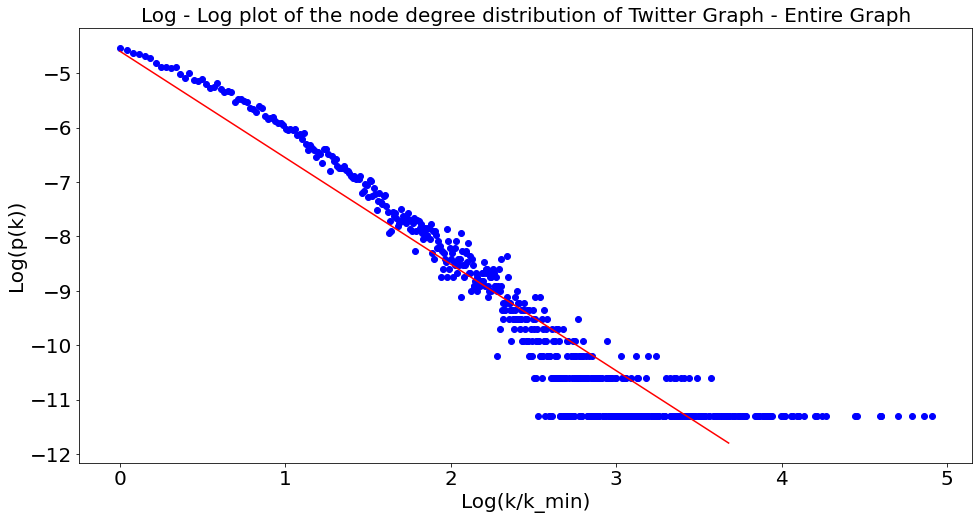

In [14]:
plt.figure(figsize=(16,8))

plt.scatter(X, y, color='b')
plt.plot(X[0:-50], model.predict(X[0:-50])[:,0], color='r')
plt.xlabel("Log(k/k_min)", fontsize=20)
plt.ylabel("Log(p(k))", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xlim([-50, 4000])
#plt.ylim([ 0, 5050])
plt.title("Log - Log plot of the node degree distribution of Twitter Graph - Entire Graph", fontsize=20)
plt.show()

In [15]:
alpha = -model.coef_[0][0]
alpha

1.9570763508711497

In [22]:
probSort = np.array([i/np.sum(cntSort) for i in cntSort])

In [80]:
alpha = 1.83
kmin = 1
probPowerLaw1 = np.array([((alpha-1)/kmin)*(k/kmin)**(-alpha) for k in degSort])
probPowerLaw1 = np.array([i/np.sum(probPowerLaw1) for i in probPowerLaw1])

alpha = 1.96
kmin = 1
probPowerLaw2 = np.array([((alpha-1)/kmin)*(k/kmin)**(-alpha) for k in degSort])
probPowerLaw2 = np.array([i/np.sum(probPowerLaw2) for i in probPowerLaw2])

In [39]:
m = len(G_edges)
n = len(G_nodes)

p = 2*m/(n*(n-1))

In [41]:
from scipy.stats import binom

In [42]:
probBinom = np.array([binom.pmf(k=k, n=81306, p=p) for k in degSort])

In [57]:
lamb = 1.8307650918760991
probExp = np.array([lamb*np.exp(-lamb*k) for k in degSort])
probExp = np.array([i/np.sum(probExp) for i in probExp])

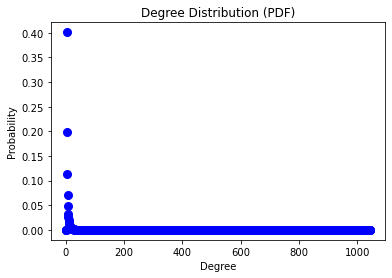

In [61]:
# Set the parameters for the Barabasi-Albert graph
n = len(G_nodes)  # Number of nodes
m = 3  # Number of edges to attach from each new node

# Generate the Barabasi-Albert graph
B = nx.barabasi_albert_graph(n, m, seed=42)

# Calculate the degree distribution (PDF)
degree_sequence = sorted([d for n, d in B.degree()], reverse=True)
degree_count = np.bincount(degree_sequence, minlength=np.max(degree_sequence)+1)
degree_prob = degree_count / degree_count.sum()

# Plot the degree distribution (PDF)
plt.plot(range(len(degree_prob)), degree_prob, 'bo', markersize=8)
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('Degree Distribution (PDF)')
plt.show()


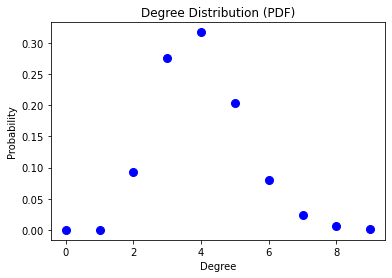

In [77]:
# Set the parameters for the Watts-Strogatz graph
n = 10000  # Number of nodes
k = 5  # Number of nearest neighbors
p = 0.5  # Probability of rewiring

# Generate the Watts-Strogatz graph
S = nx.watts_strogatz_graph(n, k, p, seed=42)

# Calculate the degree distribution (PDF)
degree_sequence = sorted([d for n, d in S.degree()], reverse=True)
degree_count = np.bincount(degree_sequence, minlength=np.max(degree_sequence)+1)
degree_probS = degree_count / degree_count.sum()

# Plot the degree distribution (PDF)
plt.plot(range(len(degree_probS)), degree_probS, 'bo', markersize=8)
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('Degree Distribution (PDF)')
plt.show()


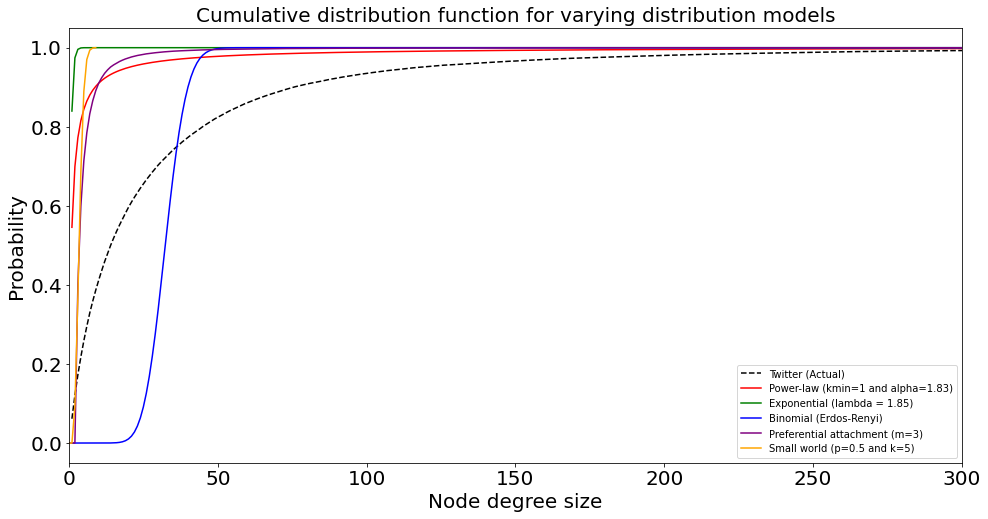

In [84]:
plt.figure(figsize=(16,8))

plt.plot(degSort, probSort.cumsum(), color='black', linestyle='--', label='Twitter (Actual)')
plt.plot(degSort, probPowerLaw1.cumsum(), color='red', label='Power-law (kmin=1 and alpha=1.83)')
plt.plot(degSort, probExp.cumsum(), color='green', label='Exponential (lambda = 1.85)')
plt.plot(degSort, probBinom.cumsum(), color='blue', label='Binomial (Erdos-Renyi)')
plt.plot(range(len(degree_prob)), degree_prob.cumsum(), color='purple', label='Preferential attachment (m=3)')
plt.plot(range(len(degree_probS)), degree_probS.cumsum(), color='orange', label='Small world (p=0.5 and k=5)')
plt.xlabel("Node degree size", fontsize=20)
plt.ylabel("Probability", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([0, 300])
#plt.ylim([ 0, 5050])
plt.legend(loc='lower right')
plt.title("Cumulative distribution function for varying distribution models", fontsize=20)
plt.show()